<a href="https://colab.research.google.com/github/utkarsh0702/Projects/blob/master/Milestone_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df= pd.read_excel('Dataset.xlsx')
df

,Hospital,Name,Date of Testing,Age,Gender,Pre-natal Complications,Delivery Type (Normal/ Forceps /C-section),Pre-mature Birth,Delayed Birth Cry,Low/High Birth weight,Neo-natal Jaundice,Low APGAR Score,Congenital organ /body part deffect,Breast feeding Complications,Primary immunizations Done,Low immunity,Seizures,Physical Trauma,Any severe Infection,Cerebral Palsy,Genetic/Chromosomal Issue,Neck Holding (Months),Independent Sitting (months,Independent Walk started (Months),Speech -One word (Months),Speech Sentence (Months),Toilet control (Months),Academic Performance(Good/Average/Poor),Peer group Interaction(Good/ Average/ Poor),Behavioural Issues / Unusual Behaviour,NOWalk/ with support,Unclear / No Speech/ Stammering
0,ACDC,Dhairya,2011-12-22,11 yrs,M,No,Forceps,No,Yes,No,Yes,Yes,yes,No,yes,No,No,No,No,No,No,4,8,13,12,26,28,Average,Good,yes,No,No
1,ACDC,Imad,2011-12-26,6 yrs,M,No,C-section,No,No,No,No,No,NO,No,Yes,Yes,No,NO,No,No,No,6,10,20,24,42,50,Poor,Poor,No,No,NO
2,ACDC,Kalyan,2011-12-12,9 yrs,M,No,Normal,No,No,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,3,7,12,11,24,30,Average,Poor,No,NO,NO
3,ACDC,Krishna,2011-12-06,7 yrs,M,No,C-section,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,3,7,14,12,42,46,Poor,Poor,Yes,No,No
4,ACDC,Manikya,2011-12-26,2 yrs/ 5 yrs,M,yes,C-section,No,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,4,9,24,18,46,42,Poor,Poor,Yes,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ACDC,Manikant,2012-06-19,7 yrs,M,yes,Normal,No,No,No,No,No,NO,No,yes,Yes,No,No,Yes,No,Yes,5,9,24,24,60,66,poor,Average,Yes,No,Yes
96,ACDC,Mani,2012-06-20,5 yrs,M,yes,C-section,No,Yes,No,No,No,NO,No,yes,Yes,No,No,Yes,No,No,3,6,12,18,36,30,good,Average,yes,No,No
97,ACDC,Msri Manju V.,2012-08-16,7 yrs,M,No,C-section,No,No,No,No,No,NO,No,Yes,No,Yes,NO,No,No,No,3,6,12,12,36,30,Good,Average,Yes,No,No
98,ACDC,Manya,2012-12-14,6 yrs,F,yes,C-section,No,No,No,No,No,NO,No,Yes,Yes,Yes,NO,No,NN,No,4,7,18,11,36,32,Average,Good,Yes,Yes,NO


# Data Preprocessing

In [25]:
df= df.apply(lambda x: x.astype(str).str.lower())
df

,Hospital,Name,Date of Testing,Age,Gender,Pre-natal Complications,Delivery Type (Normal/ Forceps /C-section),Pre-mature Birth,Delayed Birth Cry,Low/High Birth weight,Neo-natal Jaundice,Low APGAR Score,Congenital organ /body part deffect,Breast feeding Complications,Primary immunizations Done,Low immunity,Seizures,Physical Trauma,Any severe Infection,Cerebral Palsy,Genetic/Chromosomal Issue,Neck Holding (Months),Independent Sitting (months,Independent Walk started (Months),Speech -One word (Months),Speech Sentence (Months),Toilet control (Months),Academic Performance(Good/Average/Poor),Peer group Interaction(Good/ Average/ Poor),Behavioural Issues / Unusual Behaviour,NOWalk/ with support,Unclear / No Speech/ Stammering
0,acdc,dhairya,2011-12-22,11 yrs,m,no,forceps,no,yes,no,yes,yes,yes,no,yes,no,no,no,no,no,no,4,8,13,12,26,28,average,good,yes,no,no
1,acdc,imad,2011-12-26,6 yrs,m,no,c-section,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,6,10,20,24,42,50,poor,poor,no,no,no
2,acdc,kalyan,2011-12-12,9 yrs,m,no,normal,no,no,yes,no,no,no,no,yes,yes,no,no,no,no,no,3,7,12,11,24,30,average,poor,no,no,no
3,acdc,krishna,2011-12-06,7 yrs,m,no,c-section,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,3,7,14,12,42,46,poor,poor,yes,no,no
4,acdc,manikya,2011-12-26,2 yrs/ 5 yrs,m,yes,c-section,no,no,no,no,no,no,no,yes,no,no,no,yes,yes,no,4,9,24,18,46,42,poor,poor,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,acdc,manikant,2012-06-19,7 yrs,m,yes,normal,no,no,no,no,no,no,no,yes,yes,no,no,yes,no,yes,5,9,24,24,60,66,poor,average,yes,no,yes
96,acdc,mani,2012-06-20,5 yrs,m,yes,c-section,no,yes,no,no,no,no,no,yes,yes,no,no,yes,no,no,3,6,12,18,36,30,good,average,yes,no,no
97,acdc,msri manju v.,2012-08-16,7 yrs,m,no,c-section,no,no,no,no,no,no,no,yes,no,yes,no,no,no,no,3,6,12,12,36,30,good,average,yes,no,no
98,acdc,manya,2012-12-14,6 yrs,f,yes,c-section,no,no,no,no,no,no,no,yes,yes,yes,no,no,nn,no,4,7,18,11,36,32,average,good,yes,yes,no


In [26]:
#Converting yes and no to 1 and 0
df[df == 'yes'] = 1
df[df == 'no'] = 0
df[df == 'nn'] = 0
df[df == 'n'] = 0
# Good, average and poor to 2, 1, 0
df[df == 'good'] = 2
df[df == 'average'] = 1
df[df == 'poor'] = 0
#converting forceps, normal, c-section
df[df == 'forceps'] = 2
df[df == 'normal'] = 1
df[df == 'c-section'] = 0
df

,Hospital,Name,Date of Testing,Age,Gender,Pre-natal Complications,Delivery Type (Normal/ Forceps /C-section),Pre-mature Birth,Delayed Birth Cry,Low/High Birth weight,Neo-natal Jaundice,Low APGAR Score,Congenital organ /body part deffect,Breast feeding Complications,Primary immunizations Done,Low immunity,Seizures,Physical Trauma,Any severe Infection,Cerebral Palsy,Genetic/Chromosomal Issue,Neck Holding (Months),Independent Sitting (months,Independent Walk started (Months),Speech -One word (Months),Speech Sentence (Months),Toilet control (Months),Academic Performance(Good/Average/Poor),Peer group Interaction(Good/ Average/ Poor),Behavioural Issues / Unusual Behaviour,NOWalk/ with support,Unclear / No Speech/ Stammering
0,acdc,dhairya,2011-12-22,11 yrs,m,0,2,0,1,0,1,1,1,0,1,0,0,0,0,0,0,4,8,13,12,26,28,1,2,1,0,0
1,acdc,imad,2011-12-26,6 yrs,m,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,6,10,20,24,42,50,0,0,0,0,0
2,acdc,kalyan,2011-12-12,9 yrs,m,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,3,7,12,11,24,30,1,0,0,0,0
3,acdc,krishna,2011-12-06,7 yrs,m,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,3,7,14,12,42,46,0,0,1,0,0
4,acdc,manikya,2011-12-26,2 yrs/ 5 yrs,m,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,4,9,24,18,46,42,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,acdc,manikant,2012-06-19,7 yrs,m,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,5,9,24,24,60,66,0,1,1,0,1
96,acdc,mani,2012-06-20,5 yrs,m,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,3,6,12,18,36,30,2,1,1,0,0
97,acdc,msri manju v.,2012-08-16,7 yrs,m,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,3,6,12,12,36,30,2,1,1,0,0
98,acdc,manya,2012-12-14,6 yrs,f,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,4,7,18,11,36,32,1,2,1,1,0


In [27]:
x_data= df.iloc[:,5:21]
x_data

,Pre-natal Complications,Delivery Type (Normal/ Forceps /C-section),Pre-mature Birth,Delayed Birth Cry,Low/High Birth weight,Neo-natal Jaundice,Low APGAR Score,Congenital organ /body part deffect,Breast feeding Complications,Primary immunizations Done,Low immunity,Seizures,Physical Trauma,Any severe Infection,Cerebral Palsy,Genetic/Chromosomal Issue
0,0,2,0,1,0,1,1,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1
96,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
97,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
98,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0


In [28]:
x_data_mod= x_data.to_numpy()
print(x_data_mod.shape)
x_data_mod

(100, 16)


array([[0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]], dtype=object)

**Taking y label only the first column**

In [29]:
y_data=df.iloc[:,21].to_numpy()
y_data= y_data.reshape(100,1)
y_data.shape

(100, 1)

In [30]:
from sklearn.model_selection import cross_val_score, train_test_split

In [31]:
x_train, x_test, y_train, y_test= train_test_split(x_data_mod, y_data, test_size=0.1)
x_train= tf.convert_to_tensor(x_train, tf.float16)
y_train= tf.convert_to_tensor(y_train, tf.float16)
x_test= tf.convert_to_tensor(x_test, tf.float16)
y_test= tf.convert_to_tensor(y_test, tf.float16)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 16)
(10, 16)
(90, 1)
(10, 1)


# Learning Rate Scheduling


In [32]:
keras.backend.clear_session()
model= keras.models.Sequential([
                              keras.layers.Flatten(input_shape=(1,16)),
                              keras.layers.Dense(16, activation='relu'),
                              keras.layers.Dropout(0.4),
                              keras.layers.Dense(4, activation='relu'),
                              keras.layers.Dropout(0.6), 
                              keras.layers.Dense(1)
])

#Learning Rate Schedular
lr_schedular= tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-6*10**(x/20))

#model compile
adam=keras.optimizers.Adam(lr=1e-6)
model.compile(optimizer= adam, loss='mse')

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 345
Trainable params: 345
Non-trainable params: 0
__________________________________________________________

In [33]:
history= model.fit(x_train, y_train, epochs=200,callbacks= [lr_schedular])

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 98.3783 - lr: 1.0000e-06
Epoch 2/200
3/3 [==============================] - 0s 2ms/step - loss: 98.1431 - lr: 1.1220e-06
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 96.9465 - lr: 1.2589e-06
Epoch 4/200
3/3 [==============================] - 0s 1ms/step - loss: 99.2610 - lr: 1.4125e-06
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 98.8857 - lr: 1.5849e-06
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 98.0802 - lr: 1.7783e-06
Epoch 7/200
3/3 [==============================] - 0s 2ms/step - loss: 98.2459 - lr: 1.9953e-06
Epoch 8/200
3/3 [==============================] - 0s 1ms/step - loss: 99.2466 - lr: 2.2387e-06
Epoch 9/200
3/3 [==============================] - 0s 2ms/step - loss: 98.7230 - lr: 2.5119e-06
Epoch 10/200
3/3 [==============================] - 0s 2ms/step - loss: 99.6958 - lr: 2.8184e-06
Epoch 11/200
3/3 [=====================

In [34]:
loss= min(history.history['loss'])
losses= history.history['loss']
index=losses.index(loss)
lrs= history.history['lr']
count=0
for i in lrs:
  if count==index:
    lr=i
    break
  count+=1
print(lr)
print(loss)

0.1
18.626996994018555


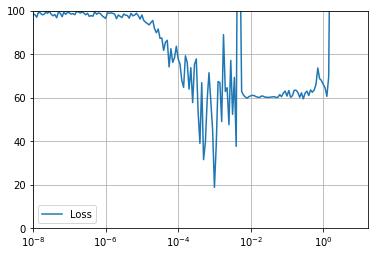

In [37]:
lrs= 1e-8*(10**(np.arange(200)/20))
plt.semilogx(lrs, history.history["loss"], label='Loss')
plt.axis([1e-8, 1.7e1, 0, 100])
plt.legend(loc='best')
plt.grid(True)

## Training the model

In [38]:
keras.backend.clear_session()
model= keras.models.Sequential([
                              keras.layers.Flatten(input_shape=(1,16)),
                              keras.layers.Dense(16, activation='relu'),
                              keras.layers.Dropout(0.4),
                              keras.layers.Dense(4, activation='relu'),
                              keras.layers.Dropout(0.6), 
                              keras.layers.Dense(1)
])

#model compile
adam=keras.optimizers.Adam(lr=lr)
model.compile(optimizer= adam, loss='mse')

#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 345
Trainable params: 345
Non-trainable params: 0
__________________________________________________________

In [39]:
history= model.fit(x_train, y_train, epochs= 1000)

Epoch 1/1000
3/3 [==============================] - 0s 2ms/step - loss: 89.6460
Epoch 2/1000
3/3 [==============================] - 0s 2ms/step - loss: 95.9448
Epoch 3/1000
3/3 [==============================] - 0s 2ms/step - loss: 72.7111
Epoch 4/1000
3/3 [==============================] - 0s 1ms/step - loss: 84.4971
Epoch 5/1000
3/3 [==============================] - 0s 1ms/step - loss: 77.0818
Epoch 6/1000
3/3 [==============================] - 0s 1ms/step - loss: 79.8192
Epoch 7/1000
3/3 [==============================] - 0s 1ms/step - loss: 64.8968
Epoch 8/1000
3/3 [==============================] - 0s 2ms/step - loss: 75.4868
Epoch 9/1000
3/3 [==============================] - 0s 1ms/step - loss: 73.0676
Epoch 10/1000
3/3 [==============================] - 0s 2ms/step - loss: 72.5946
Epoch 11/1000
3/3 [==============================] - 0s 2ms/step - loss: 57.1353
Epoch 12/1000
3/3 [==============================] - 0s 1ms/step - loss: 61.1157
Epoch 13/1000
3/3 [==================

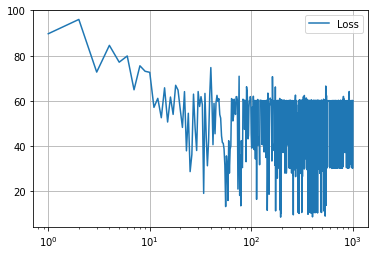

In [40]:
epochs= range(1,1001)
plt.semilogx(epochs, history.history["loss"], label='Loss')
plt.legend(loc='best')
plt.grid(True)

In [41]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 4.8568


4.856818199157715

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=1000),x_data_mod, y_data)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

array([0.3 , 0.3 , 0.4 , 0.4 , 0.25])